In [1]:
import sys
sys.path.append("../src")

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import joblib
import numpy as np
import json
import pandas as pd
import copy
import hashlib
import matplotlib.pyplot as plt

import util as util

## Load Config File

In [3]:
params = util.load_config()

In [4]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = util.pickle_load(params["train_feng_set_path"][0])
    y_train = util.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train


def load_test_feng(params: dict) -> pd.DataFrame:
    # Load test set
    x_test = util.pickle_load(params["test_feng_set_path"][0])
    y_test = util.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test


In [5]:
def load_dataset(params: dict) -> pd.DataFrame:
    # Debug message
    util.print_debug("Loading dataset.")

    # Load train set
    x_train, y_train = load_train_feng(params)

    # Load test set
    x_test, y_test = load_test_feng(params)

    # Debug message
    util.print_debug("Dataset loaded.")

    # Return the dataset
    return x_train, y_train, x_test, y_test


In [6]:
x_train, y_train, x_test, y_test = load_dataset(params)

2023-04-18 04:49:06.437914 Loading dataset.
2023-04-18 04:49:06.468321 Dataset loaded.


Evaluation Metric: **RMSE**


In [7]:
x_train.sum()

17543.999999999996

In [8]:
y_train

4602     275000.0
6978     238500.0
16415    158300.0
2549      70500.0
11025    222300.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 17544, dtype: float64

## LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)  ## train

LinearRegression()

In [10]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=x_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=x_train, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D


RMSE Scores Using LinearRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using LinearRegression --- 67880.1426
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 67898.8887


### `2. Ridge`
`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L2-Norm)`

In [11]:
## Define Ridge Model (Regularized Version of LinearRegression)
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(x_train, y_train)  ## train the model

Ridge(alpha=0.9, solver='cholesky')

In [12]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=x_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=x_train, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE Scores Using Ridge --- [66472.689  69222.7453 66350.7247 67031.9174 70323.0198]
Mean of RMSE Scores Using Ridge --- 67880.2192
************************************************************************************************************************
RMSE after prediction Using Ridge --- 67898.9471


### `3. Lasso`

`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)`

In [13]:
## Define Lasso Model (Regularized Version of LinearRegression)
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(x_train, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [14]:
## check the weights using Lasso, and Ridge --- Lasso is a Features Selection Model ? why?
lasso_reg.coef_

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857523,  -5501.79735044,   3698.19799083])

### `4. KNN`

In [15]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(x_train, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [16]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=x_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=x_train, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE Scores Using KNN --- [60978.9699 61687.7848 60277.5273 59442.3636 62191.8308]
Mean of RMSE Scores Using KNN --- 60915.6953
************************************************************************************************************************
RMSE after prediction Using KNN --- 60923.5123


### `5. RandomForest`

In [17]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(x_train, y_train)  ## train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [18]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=x_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=x_train, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
Mean of RMSE Scores Using RandomForest --- 59969.6780
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 59980.3194


`Since RMSE from Random Forest indicate better fit from the rest of the training model, we should do tuning RF model`

### `RF Tuning`

In [19]:
## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)

search_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2391187635.752 total time=  10.2s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2781205995.392 total time=   8.6s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2645155556.888 total time=   8.2s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2418477575.713 total time=  10.5s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2556063413.546 total time=   7.8s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2492709737.035 total time=  11.1s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2884779798.841 total time=  10.8s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2755109200.857 total time=  10.4s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2509031588.719 total time=  10.6s
[C

[CV 5/5] END max_depth=4, max_samples=1, n_estimators=150;, score=-13489042553.576 total time=   0.6s
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2384896179.131 total time=  24.4s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2759362249.987 total time=  23.3s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2648709690.778 total time=  24.2s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2414566168.514 total time=  28.4s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2539287365.132 total time=  24.3s
[CV 1/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-2969350121.079 total time=  12.1s
[CV 2/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3285813274.305 total time=  12.5s
[CV 3/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3182203195.062 total time=  12.4s
[CV 4/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [20]:
## Get the best Params
best_forest_params = search_random_forest.best_params_
print('best_forest_params -- ', best_forest_params)

with open(params["best_rf_param_log_path"], "w") as outfile:
    json.dump(best_forest_params, outfile, default=str)


## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

with open(params["best_rf_estimator_log_path"], "w") as outfile:
    json.dump(best_forest, outfile, default=str)

best_forest_params --  {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}
best_forest --  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      n_jobs=-1, random_state=42)


In [21]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=x_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   ## we want it positive
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=x_train, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned RandomForest --- [48550.1057 52281.4938 51246.7275 48834.964  50251.959 ]
Mean of RMSE Scores Using Tuned RandomForest --- 50233.0500
************************************************************************************************************************
RMSE after prediction Using Tuned RandomForest --- 50252.9752


### `XGboost -- try above and beyond`

In [22]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=x_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=x_train, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned XGBoost --- [46401.218  48678.5008 48205.3615 46268.9467 48333.7256]
Mean of RMSE Scores Using XGBoost --- 47577.5505
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 47588.5920


### `Tuning XGBoost`

In [24]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(x_train, y_train)  ## train

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,


In [25]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

with open(params["best_xgb_param_log_path"], "w") as outfile:
    json.dump(best_xgb_params, outfile, default=str)


## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

with open(params["best_xgb_estimator_log_path"], "w") as outfile:
    json.dump(best_xgb, outfile, default=str)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [26]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=x_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=x_train, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned Tuned XGBoost --- [44577.0097 46753.8341 46620.9049 45085.3031 46345.7689]
Mean of RMSE Scores Using Tuned XGBoost --- 45876.5642
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 45884.9481


### `Models Comparison`

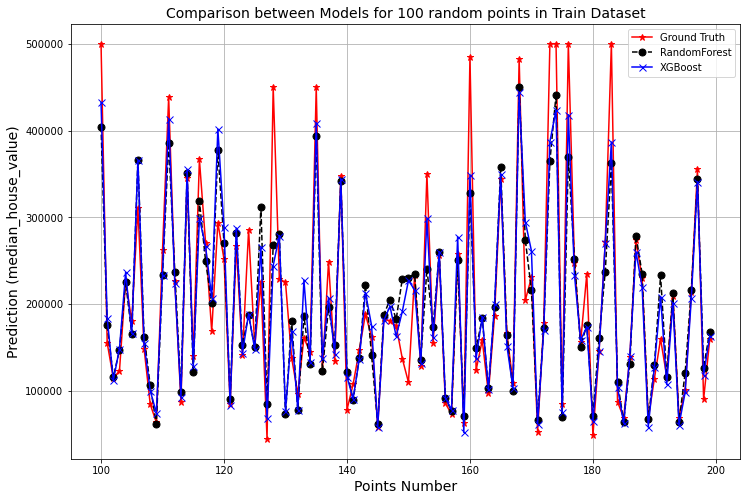

In [27]:
## Plotting
x_x = np.arange(100, 200)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:200], 'r*-',  markersize=7, label='Ground Truth')  ## for train
plt.plot(x_x, y_pred_tuned_forest[100:200], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, y_pred_tuned_xgb[100:200], 'bx-', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

### `Download the best Model --- best_xgb`

In [28]:
## Download using joblib
util.pickle_dump(best_xgb, params["production_model_path"])
# joblib.dump(best_xgb, 'model_XGBoost.pkl')

In [29]:
loaded_model = util.pickle_load(params["production_model_path"])
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### `Inference on Test Dataset`

In [30]:
## Now, we can touch Test Dataset using (loaded_model == best_xgb) -- tuned XGBoost Model
y_pred_test = loaded_model.predict(x_test)  ## Remember X_test_final --> is processed and ready (take care)

## RMSE on test after finishing all my work
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using XGBoost -- {rmse_test:.3f}')   ## Very Good :D

RMSE on test Dataset using XGBoost -- 44640.304


In [31]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
19053     96400.0
9444      92400.0
20266    213900.0
13522    155000.0
6114     133000.0
Name: median_house_value, Length: 3096, dtype: float64

In [32]:
x_test

array([[ 0.28503676,  0.1950594 , -0.28418942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06065351, -0.23550335,  0.1123855 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.42526222,  1.0093846 ,  1.85731512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.20026975, -0.67074613,  1.38142522, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.08284386, -0.66138607, -0.91870928, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83851543, -0.70818637,  0.66759038, ...,  0.        ,
         0.        ,  0.        ]])

[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2593926229.022 total time=   5.5s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2478944161.873 total time=   6.5s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2712761086.288 total time=   5.6s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8;, score=-2270456141.152 total time=   8.9s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9;, score=-2416475990.355 total time=   8.7s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8;, score=-2369596436.516 total time=   8.4s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9;, score=-2165033433.474 total time=   9.0s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9;, score=-2333386788.991 total time=   8.6s
[CV 4/5] END learning_rate=0.1, max_dept

[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2590239392.349 total time=   5.6s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2520280703.095 total time=   6.6s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8;, score=-2435177492.184 total time=   8.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8;, score=-2553163925.669 total time=   9.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9;, score=-2275522969.951 total time=   8.5s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8;, score=-2323756873.560 total time=   8.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9;, score=-2348886609.165 total time=   8.9s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=150, subsample=0.8;, score=-2054682986.545 total time=  12.9s
[CV 5/5] END learning_rate=0.1, max_dept